<a href="https://colab.research.google.com/github/asanam767/OIBSIP/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

NAME - Katta Manasa
DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE
TASK 2
PROJECT NAME - UNEMPLOYMENT ANALYSIS WITH PYTHON


GITHUB LINK
https://github.com/asanam767/OIBSIP

PROBLEM STATEMENT
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science projeCT.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .express as px

Loading the data set

In [79]:
df=pd.read_csv('/content/Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [81]:
#renaming the columns
df.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region']

In [82]:
#printing the first five rows of the data set
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [83]:
#checking the data type of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Region                               740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [84]:
#checking for missing values
df.isnull().sum()

States                                 28
Date                                   28
Frequency                              28
Estimated Unemployment Rate            28
Estimated Employed                     28
Estimated Labour Participation Rate    28
Region                                 28
dtype: int64

In [85]:
# drop missing values
df.dropna(axis = 0, inplace = True)

In [87]:
# again check for missing values
df.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
dtype: int64

In [88]:
#check for duplicate values
df.duplicated().sum()

0

In [89]:
#descriptive statistics
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [98]:
#data exploration
# Bar Plot of Average Estimated Unemployment Rate

fig = px.bar(df, x = 'States', y ='Estimated Unemployment Rate', color = 'States', title = 'Average unemploment Rate')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [100]:
# Bar Plot of people employed in each region
fig = px.bar(df, x = 'States', y = 'Estimated Employed', color = 'States', title = 'People employed in each region')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

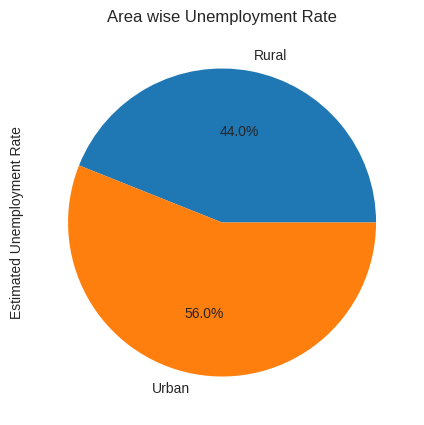

In [105]:
# area wise unemployment rate using pie chart
plt.figure(figsize=(10,5))
df.groupby('Region')['Estimated Unemployment Rate'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

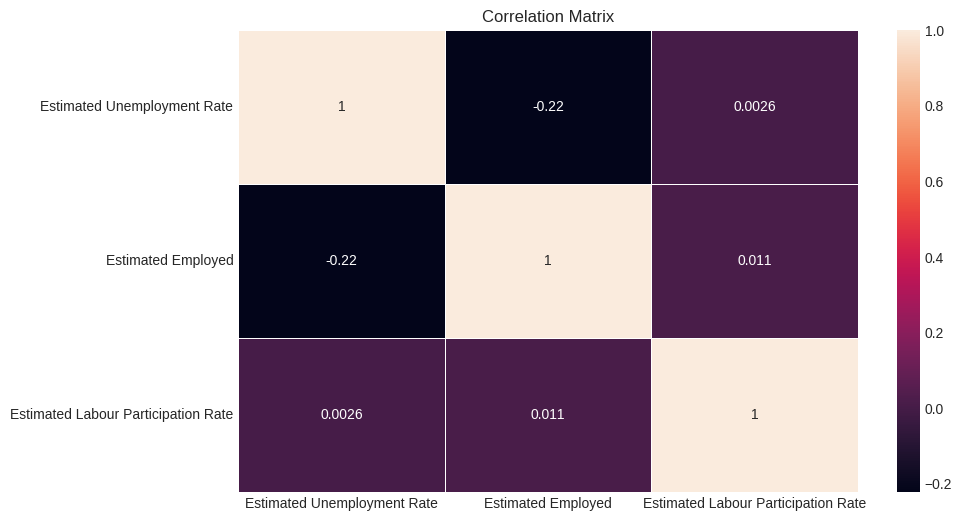

In [107]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

To find the correlation between the different features of the given data set

To visualize the unemployment rates in INDIA according to defferent regions

To visualise the unemployment rates of each INDIAN state


In [49]:

# plotting sunburst

unemployment = d[['States','Region','Estimated Unemployment Rate']]
figure = px.sunburst(unemployment,path=['Region','States'],
                     values='Estimated Unemployment Rate',
                     width=700,height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()